# 6장. R 기초와 데이터 마트

## 3. 결측값 처리와 이상값 검색

### (2) 데이터 기초 통계

In [1]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [4]:
cov(iris[, 1:4])   # 공분산

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


In [5]:
cor(iris[, 1:4])   # 상관계수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


### (3) 결측값 처리

- Amelia 패키지 사용
- 결측값은 NA(Not Available), 불가능한 값은 NaN(Not a Number)

In [6]:
y <- c(1, 2, 3, NA)
is.na(y)  # is.na() : 결측값 여부 확인

[1] FALSE FALSE FALSE  TRUE

In [7]:
# iris 데이터 특정값 결측처리
data(iris)
iris[iris$Petal.Width == 0.2, "Petal.Width"] <- NA
is.na(iris$Petal.Width)[1:10]

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE

In [8]:
iris[1:10, "Petal.Width"]

[1]  NA  NA  NA  NA  NA 0.4 0.3  NA  NA 0.1

In [9]:
# reshape 패키지의 complete.cases() 함수 : 해당 행의 모든 값이 NA가 아닌 경우 TRUE, 해당 행의 값이 하나라도 NA를 포함하고 있는 경우 FALSE를 반환
# 이를 활용하여 NA를 포함하는 행 찾기
install.packages("reshape")
library(reshape)
data(french_fries)
french_fries[!complete.cases(french_fries),]   # 결측열만 추출

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




,time,treatment,subject,rep,potato,buttery,grassy,rancid,painty
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
315,5,3,15,1,NA,NA,NA,NA,NA
455,7,2,79,1,7.3,NA,0.0,0.7,0
515,8,1,79,1,10.5,NA,0.0,0.5,0
520,8,2,16,1,4.5,NA,1.4,6.7,0
563,8,2,79,2,5.7,0,1.4,2.3,NA


In [10]:
# Amelia 패키지를 이용한 결측값 imputation
install.packages("Amelia")
library(Amelia)
data(freetrade)
head(freetrade)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1981,SriLanka,NA,6,14988000,461.0236,1.937347,0,12.4,0.2593112
2,1982,SriLanka,NA,5,15189000,473.7634,1.964430,0,12.5,0.2558008
3,1983,SriLanka,41.3,5,15417000,489.2266,1.663936,1,12.3,0.2655022
4,1984,SriLanka,NA,5,15599000,508.1739,2.797462,0,12.3,0.2988009
5,1985,SriLanka,31.0,5,15837000,525.5609,2.259116,0,12.3,0.2952431
6,1986,SriLanka,NA,5,16117000,538.9237,1.832549,0,12.5,0.2886563


In [11]:
# 다중 전가(Multiple Imputation)
a.out <- amelia(freetrade, m = 5, ts = "year", cs = "country")   # m = imputation 데이터셋 수(기본적으로 5 사용), ts : time-series variable, cs : cross-sectional variable

-- Imputation 1 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

-- Imputation 2 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

-- Imputation 3 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

-- Imputation 4 --

  1  2  3  4  5  6  7  8  9 10 11

-- Imputation 5 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14



In [12]:
a.out


Amelia output with 5 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  17
Imputation 2:  15
Imputation 3:  17
Imputation 4:  11
Imputation 5:  14


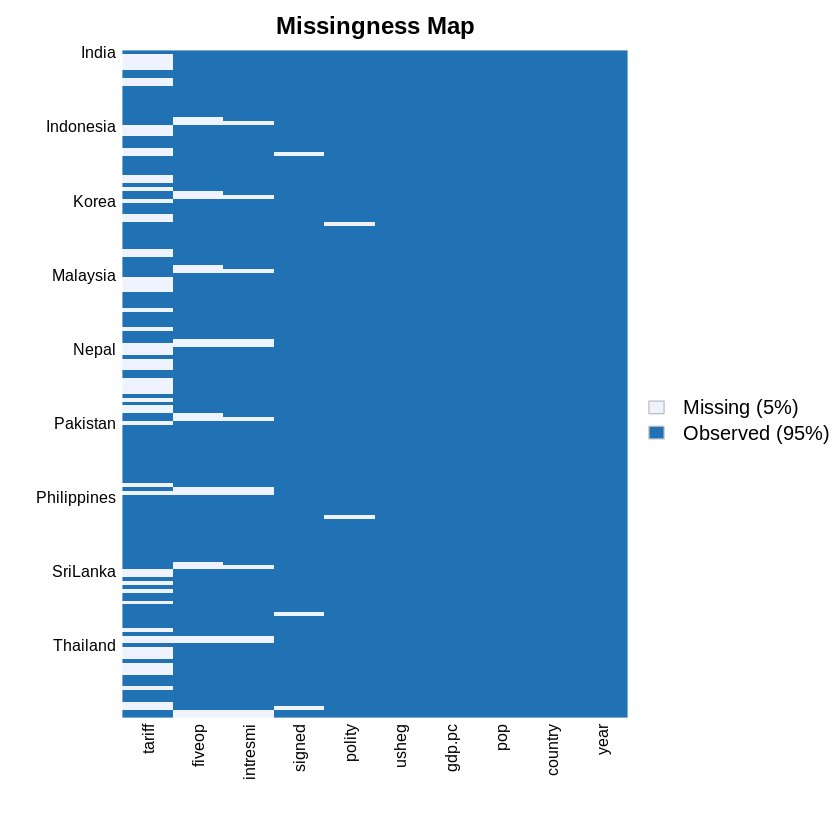

In [13]:
# 결측값을 처리하기 전
missmap(a.out)     # misssmap() : 결측 지도(missingness map). 결측 상태의 데이터셋 그리드와 컬러 그리드 시각화(행은 관측, 열은 변수)

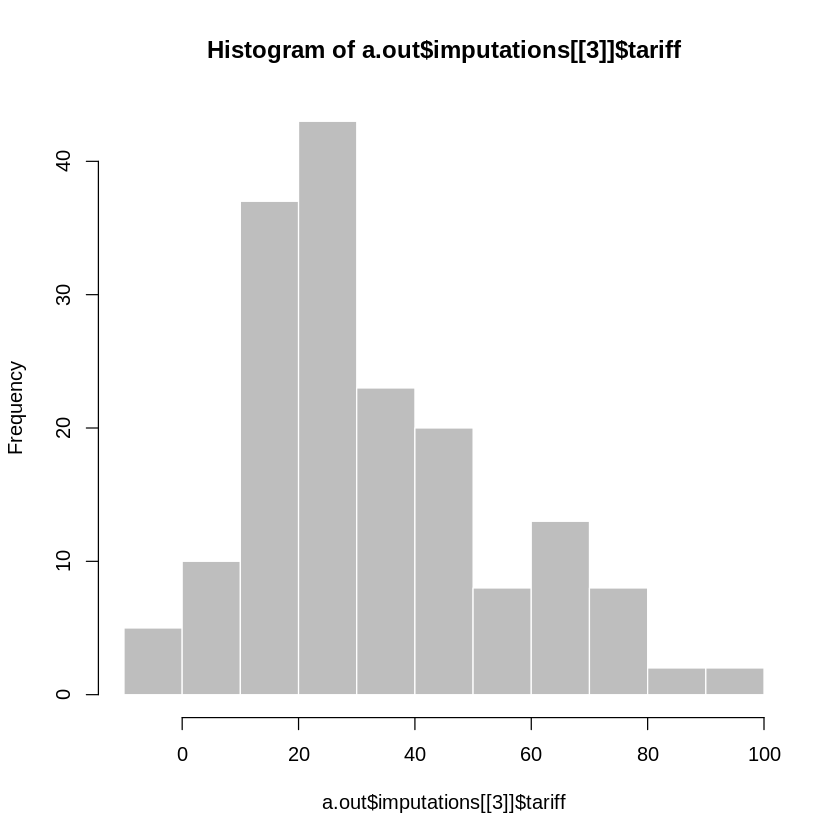

In [14]:
hist(a.out$imputations[[3]]$tariff, col = "grey", border = "white")   # 3번째 imputation 데이터셋 적용된 tariff 변수를 히스토그램으로 나타내기

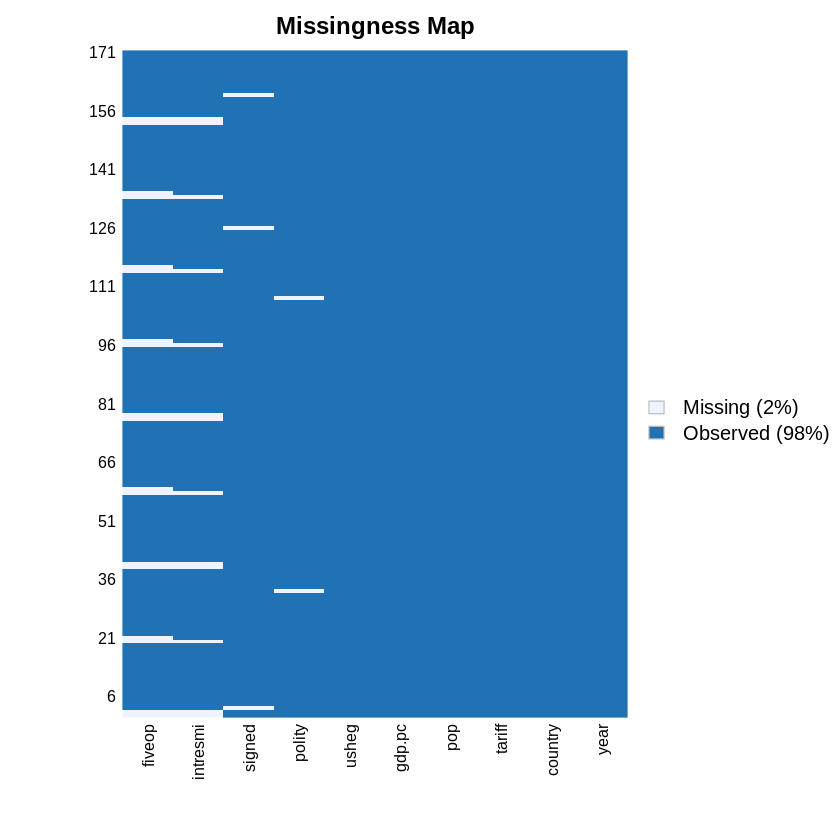

In [15]:
# 결측값을 처리하기 후(imputation 3번째 사용)
freetrade$tariff <- a.out$imputations[[3]]$tariff        # imputation 값을 데이터셋에 사용
missmap(freetrade)

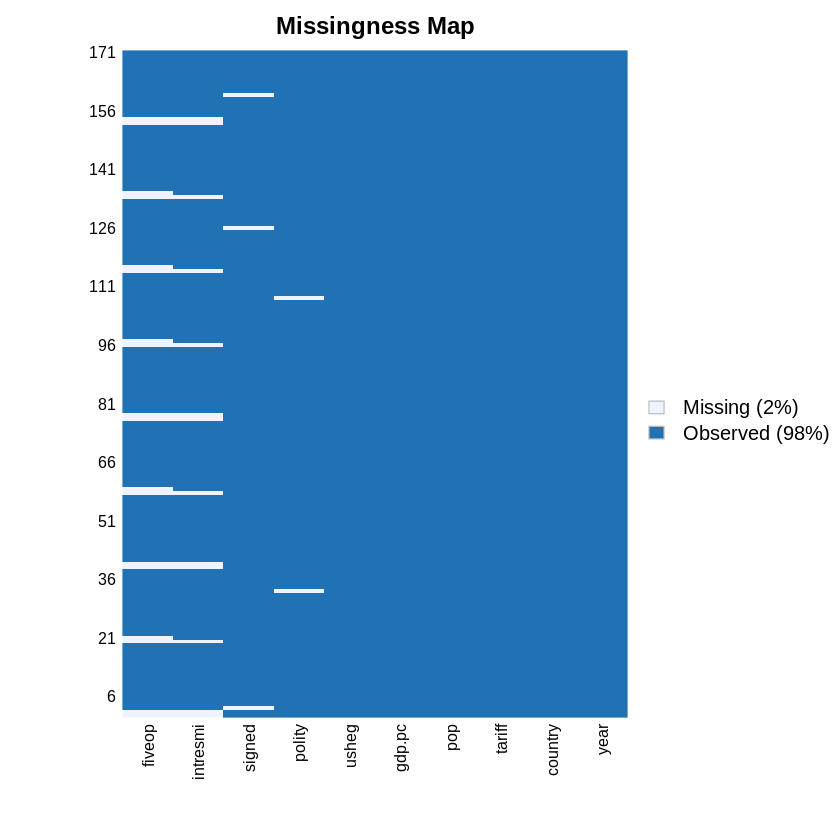

In [16]:
# 결측값을 처리하기 후(imputation 5번째 사용)
freetrade$tariff <- a.out$imputations[[5]]$tariff        # imputation 값을 데이터셋에 사용
missmap(freetrade)

### (4) 이상값 검색

- 이상값과 관련된 알고리즘으로 ESD, MADM 및 boxplot, summary 함수 등을 이용함

In [17]:
install.packages("outliers")
library(outliers)
set.seed(1234)
y = rnorm(100)
outlier(y)       # 평균과 가장 차이가 많이 나는 값 출력

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 2.548991

In [18]:
outlier(y, opposite = TRUE)     # 반대 방향으로 가장 차이가 많이 나는 값 출력

[1] -2.345698

In [19]:
y[1:10]

[1] -1.2070657  0.2774292  1.0844412 -2.3456977  0.4291247  0.5060559
 [7] -0.5747400 -0.5466319 -0.5644520 -0.8900378

In [20]:
dim(y) <- c(20, 5)      # (20 x 5) 행렬 생성
y

-1.20706575,0.1340882,1.4494963,0.656588464,-0.17778996
0.27742924,-0.4906859,-1.0686427,2.548991071,-0.16999408
1.08444118,-0.4405479,-0.8553646,-0.034760390,-1.37230189
-2.34569770,0.4595894,-0.2806230,-0.669633580,-0.17378717
0.42912469,-0.6937202,-0.9943401,-0.007604756,0.85023226
0.50605589,-1.4482049,-0.9685143,1.777084448,0.69760871
-0.57473996,0.5747557,-1.1073182,-1.138607737,0.54999735
-0.54663186,-1.0236557,-1.2519859,1.367827179,-0.40273198
-0.56445200,-0.0151383,-0.5238281,1.329564791,-0.19159377
-0.89003783,-0.9359486,-0.4968500,0.336472797,-1.19452788
-0.47719270,1.1022975,-1.8060313,0.006892838,-0.05315882


In [21]:
outlier(y)     # 각 열의 평균과 가장 차이가 많은 값을 각 column별로 출력

[1] 2.415835 1.102298 1.647817 2.548991 2.121117

In [22]:
outlier(y, opposite = TRUE)   # 각 column별로 반대 방향으로 열 평균과 가장 차이가 많은 값 출력

[1] -2.345698 -2.180040 -1.806031 -1.390701 -1.372302

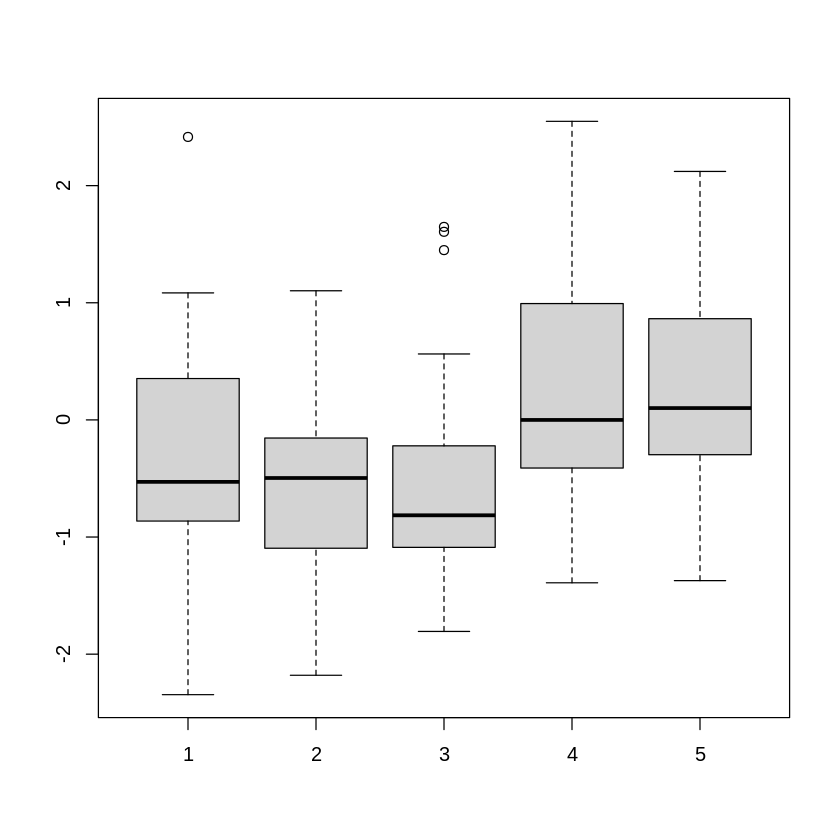

In [23]:
boxplot(y)

### (추가) 왜도(skew), 첨도(kurtosis) 확인하기

In [24]:
x <- rchisq(100, 5)         # 자유도가 5인 카이제곱분포에서 난수 100개를 만들면 왼쪽으로 기울어진 분포(왜도 값이 양의 값을 가지면 Positive Skewness, Right-skewed)
x[1:10]

[1] 5.258364 2.769972 5.945100 3.343355 4.486260 1.866626 9.333808 5.627947
 [9] 7.473748 5.330427

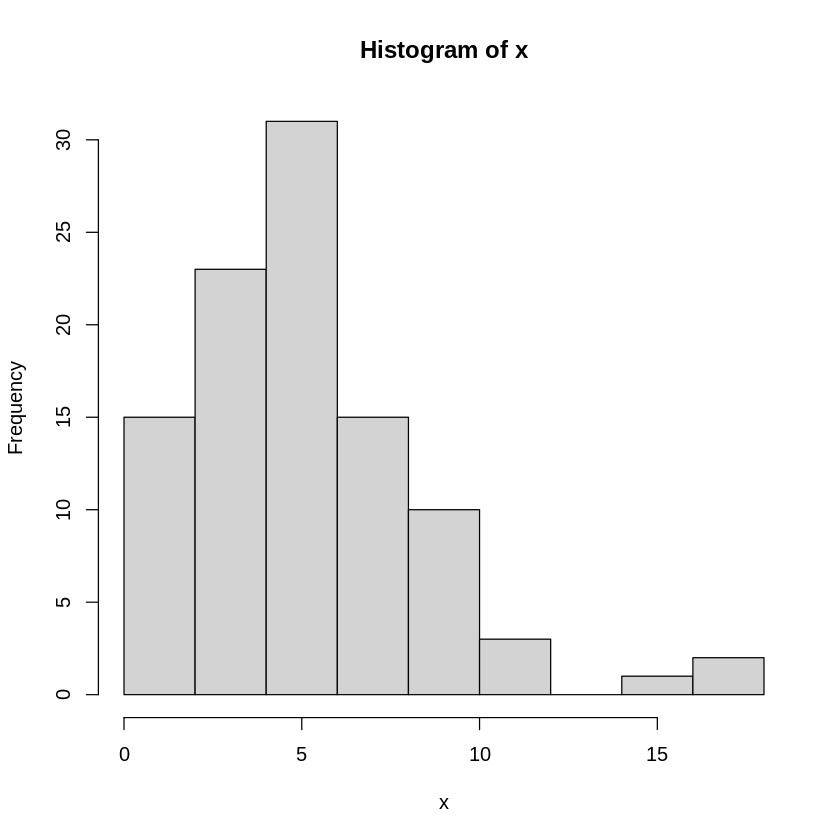

In [25]:
hist(x)

In [26]:
install.packages("psych")
library(psych)
describe(x)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following object is masked from ‘package:outliers’:

    outlier




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,100,5.225973,3.206235,4.806235,4.867572,2.590007,0.498219,17.14095,16.64274,1.295362,2.268529,0.3206235
